<a href="https://colab.research.google.com/github/mervebudakk/python/blob/main/10_G%C3%B6r%C3%BCnt%C3%BC_%C3%87evirme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. GÖRÜNTÜ ÇEVİRME
Rotasyon operatörü, bir giriş görüntüsündeki bir resim elemanının konumunu (x1, y1), bir kullanıcı tarafından belirlenen Q açısı boyunca döndürerek çıktı görüntüsündeki bir pozisyona (x2, y2) yerleştiren bir geometrik dönüşüm gerçekleştirir. Görüntünün sınırı dışında olan çıkış yerleri (x2, y2) dikkate alınmaz. Rotasyon en yaygın olarak bir görüntünün görsel görünümünü iyileştirmek için kullanılır, ancak yönlendirici operatörlerin dahil olduğu uygulamalarda bir önişlemci olarak yararlı olabilir. Döndürme özel bir affine dönüşümü olgusudur.
Rotasyon operatörünün dönüşüm formülü :


In [ ]:
#Google Drive'ınızı bağlamak için kullanılır.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


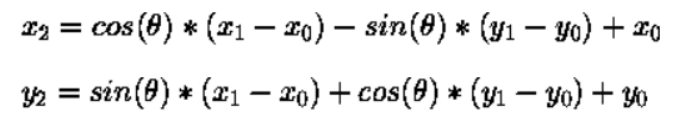

In [ ]:
from IPython.display import Image
Image(filename="/content/goruntu_cevirme_formul.png")

Burada (x0, y0) dönme merkezinin koordinatları (giriş görüntüsünde) ve Q, pozitif açılara sahip saat yönündeki dönüşleri olan  dönme açısıdır. (Burada, görüntü koordinatlarında çalıştığımıza dikkat edin, böylece y ekseni gider.) Y ekseninin yukarı doğru gelmesi için de benzer rotasyon formülü tanımlanabilir.) Çevirme operatöründen daha da fazlası, döndürme işlemi, görüntünün sınırlarına uymayan çıkış konumlarını (x2, y2) üretir. Orijinal giriş görüntüsünün boyutları. Bu gibi durumlarda, çoğu uygulama tarafından görüntünün dışında haritalanan hedef öğeler göz ardı edilir. Bir görüntünün döndürüldüğü piksel konumları genellikle siyah piksellerle doldurulur.

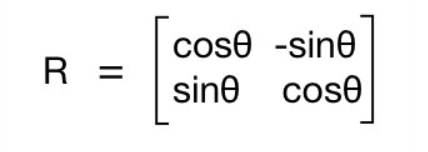

In [ ]:
Image(filename="/content/r.png")

Döndürme algoritması, çeviri tarafından kullanılanın aksine, tam sayı olmayan koordinatlar (x2, y2) üretebilir. Her bir tamsayı konumunda piksellerin yoğunluğunun üretilmesi için, farklı buluşsal yöntemler (veya yeniden örnekleme teknikleri) kullanılabilir Örneğin, iki yaygın yöntem şunları içerir:

* Her bir tamsayı piksel konumundaki yoğunluk seviyesinin, en yakın tam sayı olmayan komşunun (x2, y2) değerini almasına izin verin.
* Her tamsayı piksel konumundaki yoğunluk düzeyini, n en yakın tam sayı olmayan değerlerin ağırlıklı ortalamasını temel alarak hesaplayın. Ağırlık, yakındaki projeksiyonların uzaklık veya piksel çakışmasıyla orantılıdır.

Sonuncu yöntem daha iyi sonuç verir, ancak algoritmanın hesaplama süresini artırır.


##1.1 Görüntü Çevirme İşleminin Uygulanması


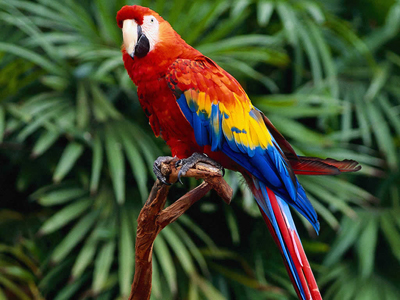

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

#Yukarıdaki fonksiyonları ve yapısal elemanı oluşturmak için cv2 paketini içe aktarmalıdır.

image=cv2.imread("/content/goruntu_cevirme_resim.jpg")

cv2_imshow (image)



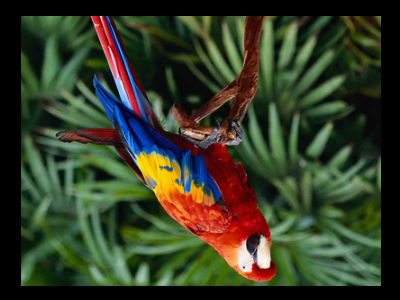

True

In [ ]:
#Ardından, resmin okunması gerekiyor. Bu cv2.imread (dosya adı, flag) işlevi tarafından yapılır.

height, width = image.shape[:2]

#Görüntüyü merkezin etrafında döndürmek için resim ikiye bölünür.

rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2),180, .9)

#2D rotasyonun bir affine matrisini hesaplar.Sırasıyla gelen değerler kaynak görüntüdeki dönüş merkezi, derece cinsinden dönme açısı, izotropik ölçek faktörü.

rotated_image = cv2.warpAffine(image, rotation_matrix,(width,height))

#Bir resme afine dönüşümü uygular. Sırasıyla değerler giriş görüntüsü, dönüşüm matrisi, çıktı görüntüsünün boyutunu belirtir.

cv2_imshow ( rotated_image)

#Belirtilen pencerede bir görüntü gösterir.

cv2.imwrite("/content/yeni_rotate.png",rotated_image)

#Alternatif olarak, değiştirilmiş görüntüyü cv2.imwrite(img) işleviyle de kaydedilebilir.